In [1]:
import re
import unicodedata
import pandas as pd
import nltk

from typing import List
import unicodedata

import matplotlib.pyplot as plt
import seaborn as sns

- Create and explore bigrams for the spam data. 
- Visualize them with a word cloud. How do they compare with the ham bigrams?
- Is there any overlap in the bigrams for the spam data and the ham data?
- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [2]:
def clean(text: str) -> List[str]:
    "a simple function to prepare text data"
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words("english") + ["r", "u", "2", "ltgt"]
    text = (
        unicodedata.normalize("NFKD", text)
        .encode("ascii", "ignore")
        .decode("utf-8", "ignore")
        .lower()
    )
    words = re.sub(r"[^\w\s]", "", text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]
df = pd.read_csv("spam_clean.csv")

In [3]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/seanoslin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
df.shape

(5572, 2)

In [6]:
df.isna().sum()

label    0
text     0
dtype: int64

In [7]:
spam = df[df.label == 'spam']
spam.head()

,label,text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [8]:
one_string = spam.text.sum()
one_string

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'sFreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcvWINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 infoURGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or c

In [9]:
x = list(nltk.ngrams(one_string.split(), 2))
x

[('Free', 'entry'),
 ('entry', 'in'),
 ('in', '2'),
 ('2', 'a'),
 ('a', 'wkly'),
 ('wkly', 'comp'),
 ('comp', 'to'),
 ('to', 'win'),
 ('win', 'FA'),
 ('FA', 'Cup'),
 ('Cup', 'final'),
 ('final', 'tkts'),
 ('tkts', '21st'),
 ('21st', 'May'),
 ('May', '2005.'),
 ('2005.', 'Text'),
 ('Text', 'FA'),
 ('FA', 'to'),
 ('to', '87121'),
 ('87121', 'to'),
 ('to', 'receive'),
 ('receive', 'entry'),
 ('entry', 'question(std'),
 ('question(std', 'txt'),
 ('txt', "rate)T&C's"),
 ("rate)T&C's", 'apply'),
 ('apply', "08452810075over18'sFreeMsg"),
 ("08452810075over18'sFreeMsg", 'Hey'),
 ('Hey', 'there'),
 ('there', 'darling'),
 ('darling', "it's"),
 ("it's", 'been'),
 ('been', '3'),
 ('3', "week's"),
 ("week's", 'now'),
 ('now', 'and'),
 ('and', 'no'),
 ('no', 'word'),
 ('word', 'back!'),
 ('back!', "I'd"),
 ("I'd", 'like'),
 ('like', 'some'),
 ('some', 'fun'),
 ('fun', 'you'),
 ('you', 'up'),
 ('up', 'for'),
 ('for', 'it'),
 ('it', 'still?'),
 ('still?', 'Tb'),
 ('Tb', 'ok!'),
 ('ok!', 'XxX'),
 ('XxX

In [10]:
x = set(x)

In [11]:
ham = df[df.label == 'ham']
ham.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [12]:
one_string_h = ham.text.sum()
one_string_h

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...Ok lar... Joking wif u oni...U dun say so early hor... U c already then say...Nah I don\'t think he goes to usf, he lives around here thoughEven my brother is not like to speak with me. They treat me like aids patent.As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends CallertuneI\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today.I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.I HAVE A DATE ON SUNDAY WITH WILL!!Oh k...i\'m watching here:)Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet.Fine if thatåÕs the way u feel. ThatåÕs the way its gota 

In [13]:
y = list(nltk.ngrams(one_string_h.split(), 2))
y

[('Go', 'until'),
 ('until', 'jurong'),
 ('jurong', 'point,'),
 ('point,', 'crazy..'),
 ('crazy..', 'Available'),
 ('Available', 'only'),
 ('only', 'in'),
 ('in', 'bugis'),
 ('bugis', 'n'),
 ('n', 'great'),
 ('great', 'world'),
 ('world', 'la'),
 ('la', 'e'),
 ('e', 'buffet...'),
 ('buffet...', 'Cine'),
 ('Cine', 'there'),
 ('there', 'got'),
 ('got', 'amore'),
 ('amore', 'wat...Ok'),
 ('wat...Ok', 'lar...'),
 ('lar...', 'Joking'),
 ('Joking', 'wif'),
 ('wif', 'u'),
 ('u', 'oni...U'),
 ('oni...U', 'dun'),
 ('dun', 'say'),
 ('say', 'so'),
 ('so', 'early'),
 ('early', 'hor...'),
 ('hor...', 'U'),
 ('U', 'c'),
 ('c', 'already'),
 ('already', 'then'),
 ('then', 'say...Nah'),
 ('say...Nah', 'I'),
 ('I', "don't"),
 ("don't", 'think'),
 ('think', 'he'),
 ('he', 'goes'),
 ('goes', 'to'),
 ('to', 'usf,'),
 ('usf,', 'he'),
 ('he', 'lives'),
 ('lives', 'around'),
 ('around', 'here'),
 ('here', 'thoughEven'),
 ('thoughEven', 'my'),
 ('my', 'brother'),
 ('brother', 'is'),
 ('is', 'not'),
 ('not', 'l

In [14]:
y = set(y)

In [15]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

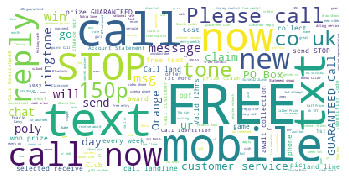

In [16]:
img = WordCloud(background_color="white").generate(one_string)
plt.imshow(img)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

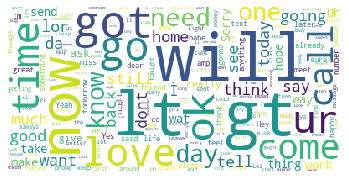

In [17]:
img = WordCloud(background_color="white").generate(one_string_h)
plt.imshow(img)
plt.axis("off")

In [18]:
common_ngrams = x.intersection(y)
common_ngrams

{('1', 'of'),
 ('1000s', 'of'),
 ('2', 'FIND'),
 ('2', 'a'),
 ('2', 'get'),
 ('2', 'go'),
 ('2', 'is'),
 ('2', 'join'),
 ('2', 'keep'),
 ('2', 'our'),
 ('2', 'sort'),
 ('2', 'take'),
 ('2', 'u'),
 ('2', 'ur'),
 ('2', 'use'),
 ('3', 'hours'),
 ('4', 'a'),
 ('4', 'free'),
 ('4', 'more'),
 ('4', 'ur'),
 ('C', 'U'),
 ('Call', 'me'),
 ('Can', 'i'),
 ('Do', 'you'),
 ('Dont', 'miss'),
 ('Enjoy', 'your'),
 ('Fancy', 'a'),
 ('Find', 'out'),
 ('For', 'a'),
 ('For', 'more'),
 ('Go', 'to'),
 ('Had', 'your'),
 ('Have', 'you'),
 ('Hope', 'you'),
 ('How', 'about'),
 ('How', 'was'),
 ('I', 'am'),
 ('I', 'have'),
 ('I', 'live'),
 ('I', 'look'),
 ('I', 'love'),
 ('I', 'missed'),
 ('I', 'need'),
 ('I', 'wanna'),
 ('I', 'want'),
 ('I', 'was'),
 ('I', 'will'),
 ('I', 'would'),
 ("I'm", 'on'),
 ("I'm", 'so'),
 ("I'm", 'waiting'),
 ('ID', 'is'),
 ('IN', 'THE'),
 ('IS', 'A'),
 ('IS', 'UR'),
 ('If', 'U'),
 ('If', 'one'),
 ('If', 'u'),
 ('If', 'you'),
 ('If', 'your'),
 ('Its', 'a'),
 ('Keep', 'your'),
 ('Lots',

In [19]:
len(common_ngrams)

721

In [20]:
a = list(nltk.ngrams(one_string.split(), 3))
a

[('Free', 'entry', 'in'),
 ('entry', 'in', '2'),
 ('in', '2', 'a'),
 ('2', 'a', 'wkly'),
 ('a', 'wkly', 'comp'),
 ('wkly', 'comp', 'to'),
 ('comp', 'to', 'win'),
 ('to', 'win', 'FA'),
 ('win', 'FA', 'Cup'),
 ('FA', 'Cup', 'final'),
 ('Cup', 'final', 'tkts'),
 ('final', 'tkts', '21st'),
 ('tkts', '21st', 'May'),
 ('21st', 'May', '2005.'),
 ('May', '2005.', 'Text'),
 ('2005.', 'Text', 'FA'),
 ('Text', 'FA', 'to'),
 ('FA', 'to', '87121'),
 ('to', '87121', 'to'),
 ('87121', 'to', 'receive'),
 ('to', 'receive', 'entry'),
 ('receive', 'entry', 'question(std'),
 ('entry', 'question(std', 'txt'),
 ('question(std', 'txt', "rate)T&C's"),
 ('txt', "rate)T&C's", 'apply'),
 ("rate)T&C's", 'apply', "08452810075over18'sFreeMsg"),
 ('apply', "08452810075over18'sFreeMsg", 'Hey'),
 ("08452810075over18'sFreeMsg", 'Hey', 'there'),
 ('Hey', 'there', 'darling'),
 ('there', 'darling', "it's"),
 ('darling', "it's", 'been'),
 ("it's", 'been', '3'),
 ('been', '3', "week's"),
 ('3', "week's", 'now'),
 ("week's",

In [21]:
a = set(a)

In [22]:
b = list(nltk.ngrams(one_string_h.split(), 3))
b

[('Go', 'until', 'jurong'),
 ('until', 'jurong', 'point,'),
 ('jurong', 'point,', 'crazy..'),
 ('point,', 'crazy..', 'Available'),
 ('crazy..', 'Available', 'only'),
 ('Available', 'only', 'in'),
 ('only', 'in', 'bugis'),
 ('in', 'bugis', 'n'),
 ('bugis', 'n', 'great'),
 ('n', 'great', 'world'),
 ('great', 'world', 'la'),
 ('world', 'la', 'e'),
 ('la', 'e', 'buffet...'),
 ('e', 'buffet...', 'Cine'),
 ('buffet...', 'Cine', 'there'),
 ('Cine', 'there', 'got'),
 ('there', 'got', 'amore'),
 ('got', 'amore', 'wat...Ok'),
 ('amore', 'wat...Ok', 'lar...'),
 ('wat...Ok', 'lar...', 'Joking'),
 ('lar...', 'Joking', 'wif'),
 ('Joking', 'wif', 'u'),
 ('wif', 'u', 'oni...U'),
 ('u', 'oni...U', 'dun'),
 ('oni...U', 'dun', 'say'),
 ('dun', 'say', 'so'),
 ('say', 'so', 'early'),
 ('so', 'early', 'hor...'),
 ('early', 'hor...', 'U'),
 ('hor...', 'U', 'c'),
 ('U', 'c', 'already'),
 ('c', 'already', 'then'),
 ('already', 'then', 'say...Nah'),
 ('then', 'say...Nah', 'I'),
 ('say...Nah', 'I', "don't"),
 ('

In [23]:
b = set(b)

In [24]:
common_ngrams3 = a.intersection(b)
common_ngrams3

{('2', 'keep', 'me'),
 ('Do', 'you', 'want'),
 ('Hope', 'you', 'enjoyed'),
 ('How', 'was', 'your'),
 ('I', 'am', 'really'),
 ('I', 'need', 'a'),
 ('I', 'need', 'your'),
 ('I', 'want', 'to'),
 ('I', 'would', 'love'),
 ('If', 'u', 'get'),
 ('This', 'is', 'the'),
 ('You', 'have', 'a'),
 ('You', 'have', 'been'),
 ('a', 'brand', 'new'),
 ('a', 'call', 'from'),
 ('a', 'couple', 'of'),
 ('account', 'has', 'been'),
 ('and', 'have', 'a'),
 ('and', 'send', 'it'),
 ('and', 'you', 'have'),
 ('any', 'of', 'the'),
 ('are', 'trying', 'to'),
 ('back', 'if', 'u'),
 ('be', 'sent', 'to'),
 ('be', 'the', 'first'),
 ('call', 'from', 'a'),
 ('call', 'from', 'your'),
 ('do', 'you', 'think'),
 ('find', 'out', 'who'),
 ('for', 'me.', 'I'),
 ('for', 'you', 'to'),
 ('from', 'a', 'landline'),
 ('has', 'been', 'credited'),
 ('have', 'got', 'our'),
 ('have', 'had', 'two'),
 ('how', 'are', 'you'),
 ('if', 'u', 'wanna'),
 ('if', 'you', 'are'),
 ('if', 'you', "don't"),
 ('if', 'you', 'have'),
 ('in', 'a', 'couple'),
 

In [25]:
len(common_ngrams3)

98

Explore the blog articles using the techniques discussed in the exploration lesson.

In [26]:
file = pd.read_csv('codeup_blog_posts.csv')